# Spotify Dataset Capstone Project

**Introduction** - Spotify Datset contains information regarding Audio Features of 160000+ songs released in between 1921 and 2020

Dataset is taken from [Kaggle Website](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks)

For this project, I was interestested in Analysing Spotify Dataset and understand few findings from the Dataset:

There's a few questions we want to answer with our data here:

**1) Which Attributes/features will likely lead a song to be more popular?**

**2) What are the most Popular Tracks?**

**3) Build a Song Recommendation System**

## 1.Import Necessary Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split


## 2.Load Datasets

In [4]:
#Load all 5 Datasets

df = pd.read_csv('/content/drive/MyDrive/Spotify-Prediction/data.csv')

df_artist = pd.read_csv('/content/drive/MyDrive/Spotify-Prediction/data_by_artist.csv')

df_by_genres = pd.read_csv('/content/drive/MyDrive/Spotify-Prediction/data_by_genres.csv')

df_year = pd.read_csv('/content/drive/MyDrive/Spotify-Prediction/data-by-years.csv')

df_w_genres = pd.read_csv('/content/drive/MyDrive/Spotify-Prediction/data_w_genres.csv')

In [5]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
df_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [7]:
df_by_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [8]:
df_year.head()

,mode,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode.1,name,popularity,release_date,speechiness,tempo
0,1,0.659,1990.0,0.000972,['Uncle Tupelo'],0.372,283960.0,0.827,0.0,4GGvLe0rAVoqGIg7aZnxBC,0.308000,2.0,0.4060,-9.546,1.0,Graveyard Shift,32.0,1990,0.0472,132.051
1,"1,0.649,1990,0.006690000000000001,['Public Ene...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.974,1990.0,0.421000,['Mary Chapin Carpenter'],0.566,200507.0,0.850,0.0,0yuyZjs0tjOJx3tjQhhXYX,0.000000,9.0,0.0306,-10.723,1.0,Down at the Twist and Shout,32.0,1990-10-09,0.0495,192.263
3,1,0.639,1990.0,0.221000,['Gilberto Santa Rosa'],0.647,345400.0,0.579,0.0,10zrcbTllxGGCw8qC7LzUx,0.000153,11.0,0.2030,-9.599,0.0,Me Volvieron A Hablar De Ella,43.0,1990,0.0364,168.440
4,1,0.647,1990.0,0.620000,['Samba Trio'],0.522,202067.0,0.405,0.0,2p54NSHGHQX1XOmjuRCKFB,0.000000,9.0,0.1700,-18.540,1.0,Quadras de Roda,31.0,1990,0.0859,109.570


In [9]:
df_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


### 3. Exploratory Data Ananlysis

In [10]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

**Observation** - There are no nulls in the dataset. Perfect!

## Data Cleaning

In [12]:
#Convert Milli secs duration into minutes
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df_by_genres['duration_min'] = df_by_genres['duration_ms']/60000
df_by_genres['duration_min'] = df_by_genres['duration_min'].round(2)

df['duration_min'].head()

0    13.86
1     3.01
2     8.33
3     3.50
4     2.78
Name: duration_min, dtype: float64

In [13]:
#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78


In [14]:
#Add Song decade column in the dataset
df['Song Decade'] = None

df.loc[(df['year'] >= 1920) & (df['year'] < 1930), 'Song Decade'] = '1920s'
df.loc[(df['year'] >= 1930) & (df['year'] < 1940), 'Song Decade'] = '1930s'
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'Song Decade'] = '1940s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'Song Decade'] = '1950s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'Song Decade'] = '1960s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980) , 'Song Decade'] = '1970s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990) , 'Song Decade'] = '1980s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000) , 'Song Decade'] = '1990s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010) , 'Song Decade'] = '2000s'
df.loc[(df['year'] >= 2010) & (df['year'] < 2020) , 'Song Decade'] = '2010s'
df.loc[(df['year'] >= 2020) & (df['year'] < 2030) , 'Song Decade'] = '2020s'

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78,1920s


In [15]:
#Remove unnecessary Braces from the genres column

df_w_genres['genres'] = df_w_genres['genres'].str.replace("'","")
df_w_genres['genres'] = df_w_genres['genres'].str.replace("[","")
df_w_genres['genres'] = df_w_genres['genres'].str.replace("]","")

df_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,show tunes,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


### Drop Duplicates

In [16]:
df.duplicated().any().sum()

0

In [17]:
df[(df['artists'] == "Billie Holiday") & (df['name']== "No Regrets - Take 1")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
2293,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,65YsrE85spoEzDa3O8iCPT,0.000145,...,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s
2298,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,4FU5KzT1MaIuIV4thAY870,0.000145,...,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s


**Observation** - There are not any duplicates in the data set because of the unique id feature.Let's see if we remove this are there any duplicates

In [18]:
df = df.drop(labels=['id', 'release_date'], axis=1)
df.shape

(170653, 19)

In [19]:
df.duplicated().sum()

565

**Observation** - After the Unique features removal, there are 628  duplicates found in the dataset which needs to be removed

In [20]:
df = df[~df.duplicated()==1]
df.shape


(170088, 19)

In [21]:
df.duplicated().sum()

0

In [22]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_min,Song Decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,2.78,1920s


In [23]:
df.duration_min.sum()/(24*365*60)

1.245739897260274

**Observation** - Spotify has 454.06 days of music or 1.24 year of continous listening. In other words it will take 1.24 years for you to listen to all the songs

In [24]:
#Drop the columns
df.drop(['duration_ms'],inplace=True,axis=1)

In [25]:
plt.rcParams.update({'font.size': 22})

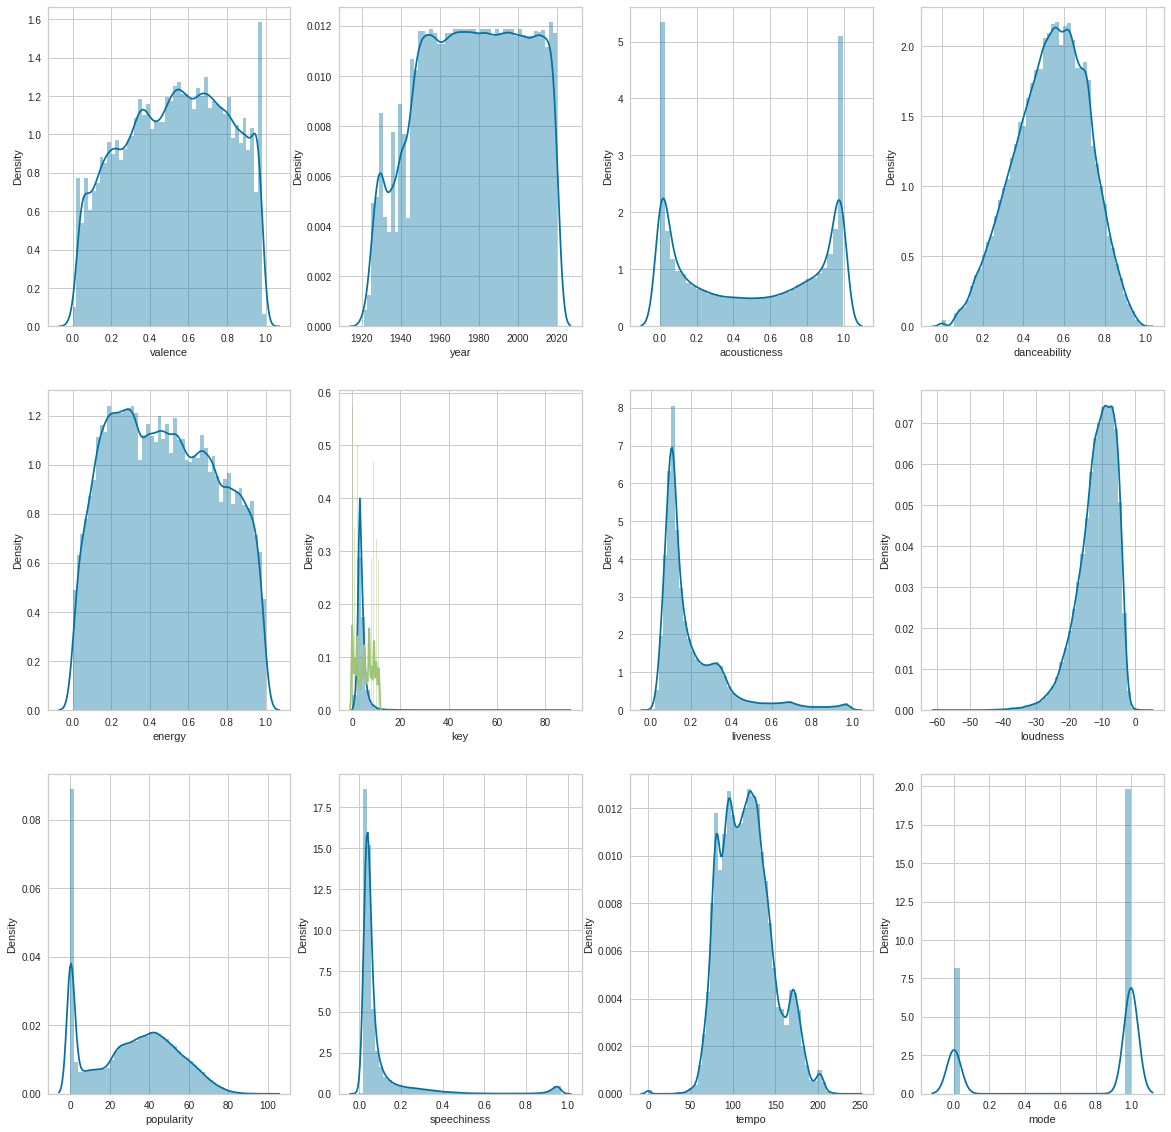

In [26]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

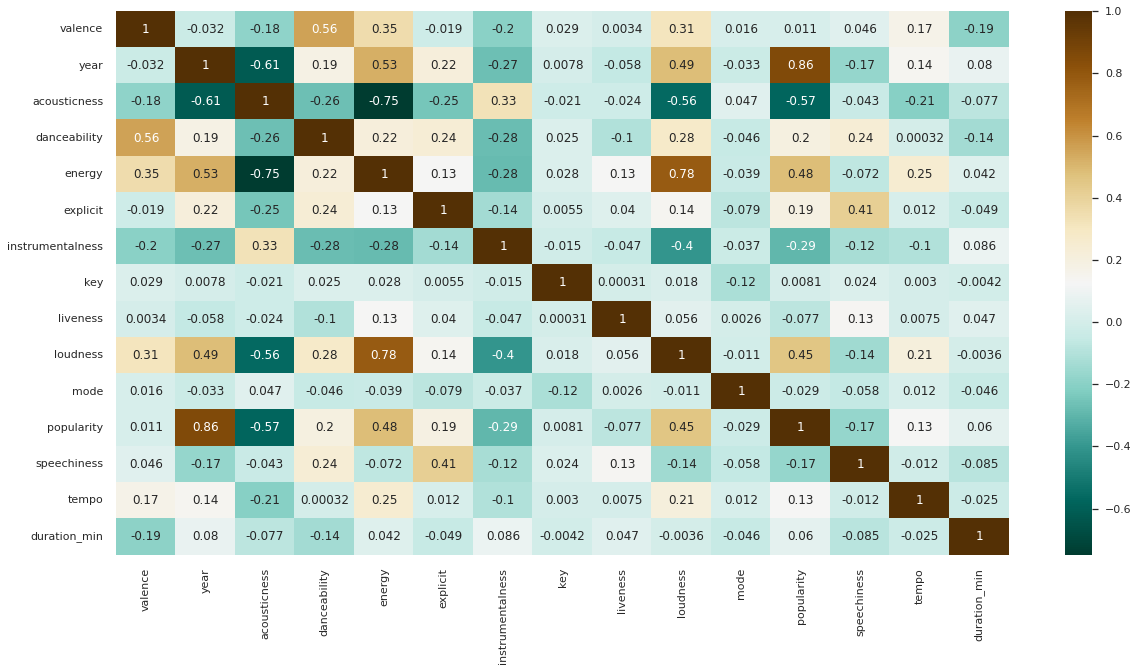

In [27]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

**Observation** As you can see above, year, danceability, energy, loudness and tempo are important features for predicting popularity.

Valence and Danceability are highly related and so is speechiness and Danceability

From the above correlation table we can derive some basic insights as to what attributes make a song more popular.

1) As expected popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates it's "popularity" metric by not just how many streams a song receives, but also how recent those streams are.

2) Energy also seems to influence a song's popularity. Many popular songs are energetic, though not necessarily dance songs. Because the correlation here is not too high, low energy songs do have some potential to be more popular.

3) Acousticness seems to be uncorrelated with popularity. Most popular songs today have either electronic or electric instruments in them. It is very rare that a piece of music played by a chamber orchestra or purely acoustic band becomes immesely popular (though, again, not impossible).

Other things worth noting:

1) Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

2) Acousticness is highly negatively correlated with energy, loudness, and year.

3) Valence and dancability are highly coorelated. Dance songs are usually happier and in a major key

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.

## Most Popular Tracks

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

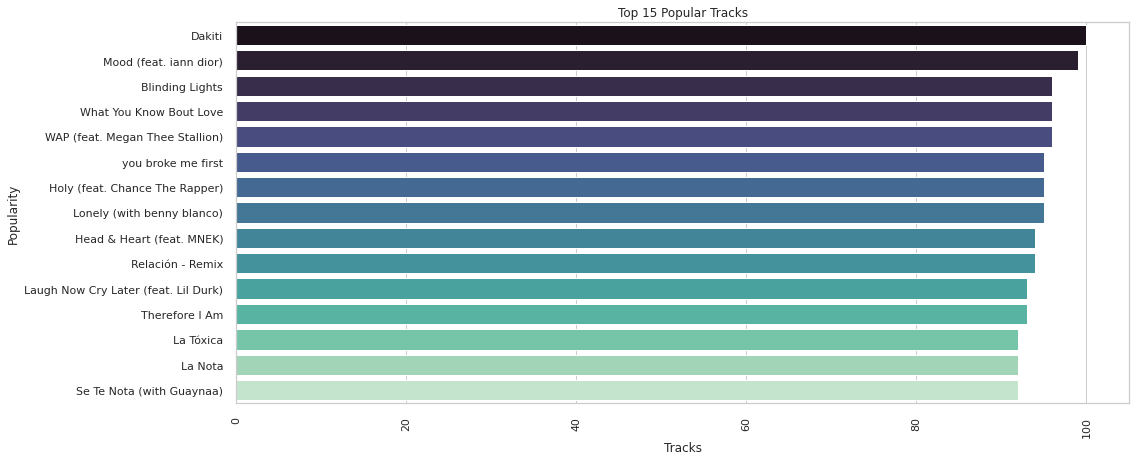

In [28]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [29]:
df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)

name
Dakiti                                  100.0
Mood (feat. iann dior)                   99.0
Blinding Lights                          96.0
What You Know Bout Love                  96.0
WAP (feat. Megan Thee Stallion)          96.0
you broke me first                       95.0
Holy (feat. Chance The Rapper)           95.0
Lonely (with benny blanco)               95.0
Head & Heart (feat. MNEK)                94.0
Relación - Remix                         94.0
Laugh Now Cry Later (feat. Lil Durk)     93.0
Therefore I Am                           93.0
La Tóxica                                92.0
La Nota                                  92.0
Se Te Nota (with Guaynaa)                92.0
Name: popularity, dtype: float64

As we have noted throughout this project is that popularity is heavily dependent on the timeframe. As we see, Dakiti has the highest popularity rating by this graph, but was released on October 30th, 2020. Using this data in our regression will give us a snapshot as to the attributes popular songs have for mid-2020, but may not work or become less relevant once we get further from this date.

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

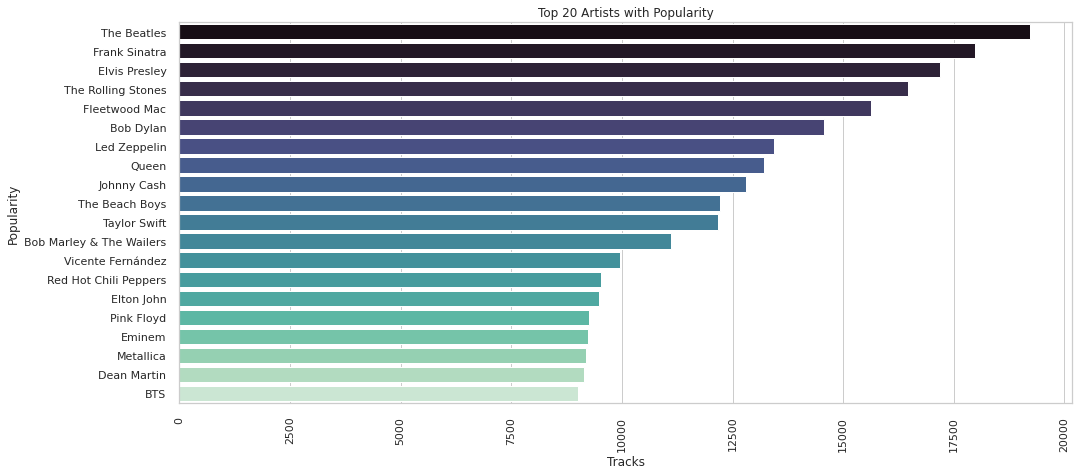

In [30]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

**Observation** - Most Popular artist from 1921-2020 - Beatles

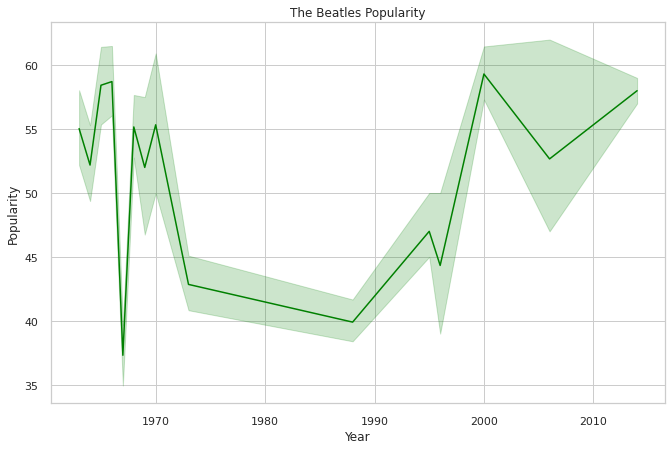

In [31]:
# visualize the popularity of The Beatles songs over the year
Beatles = df[df['artists'] == 'The Beatles']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

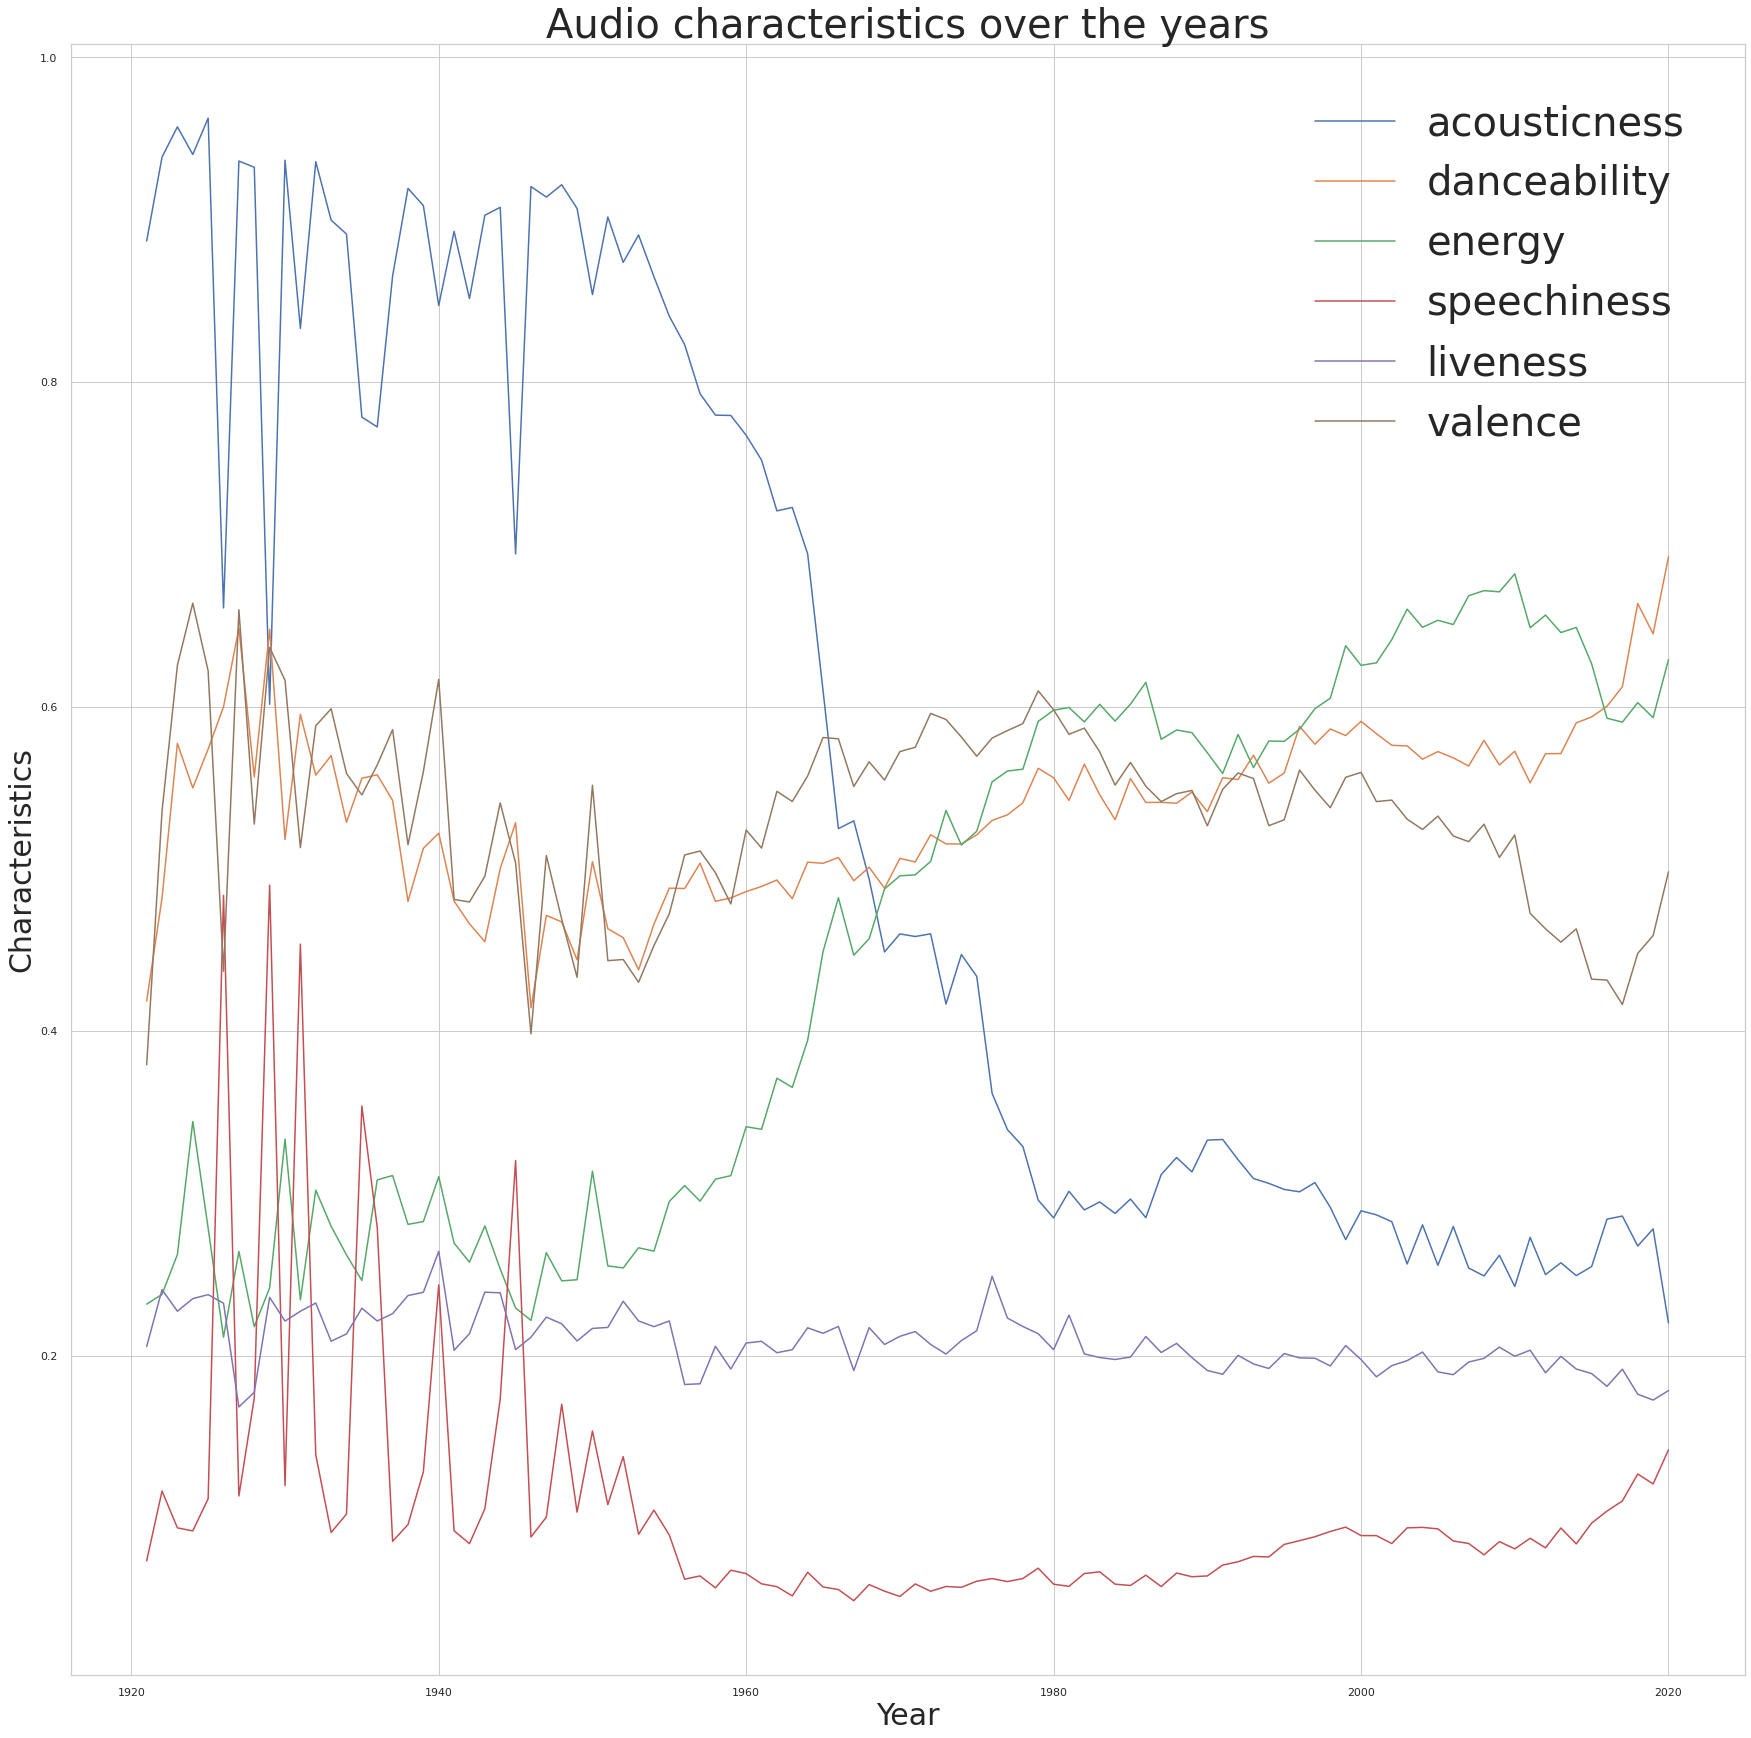

In [32]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 40}, loc = 'upper right')
plt.show()

**Observation** - Over the Years we can see gradual increase for Danceability, Energy and gradual decrease for Acousticness

1) Acousticness has decreased significantly. Most tracks past 1960 used electric instruments and, especially past the 1980s, electronic sounds. Most recorded music today includes both electric and electronic elements.

2) Danceability has varied significantly, but has stayed mostly at the same level since 1980.

3) Energy seems to be inversely related to acousticness: Was very low in the first part of the century, but then rose signficantly after 1960. It looks like it increased even more after 2000 as well.

4) Speechiness looks like it varied a lot in the first part of the 20th century, but then settled low around 1960. Note we do see a slight increase after 1980. This is likely due to the growth of rap music. Mostly music, however, is still mostly sung.

5) Liveness looks like it has always stayed relatively low. Most recorded music on Spotify was made with not audience present.

6) Valence seems to have risen until 2000 with energy and danceability, but has fallen since.



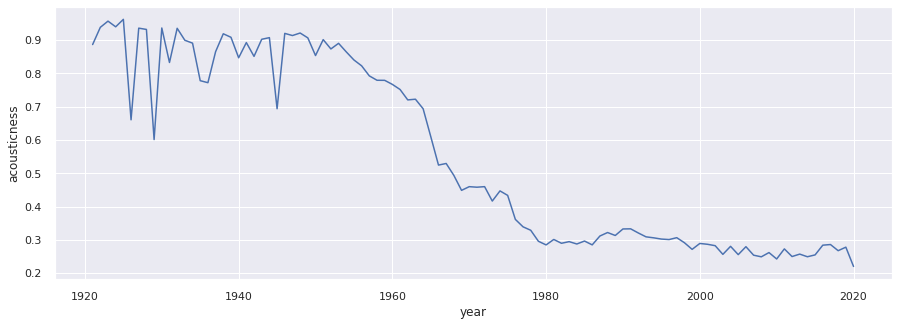

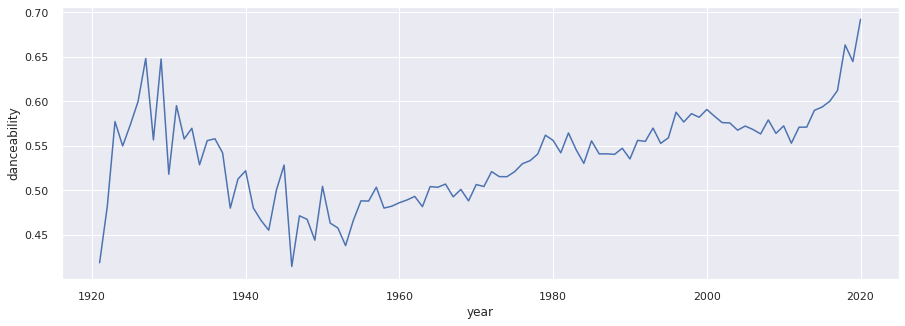

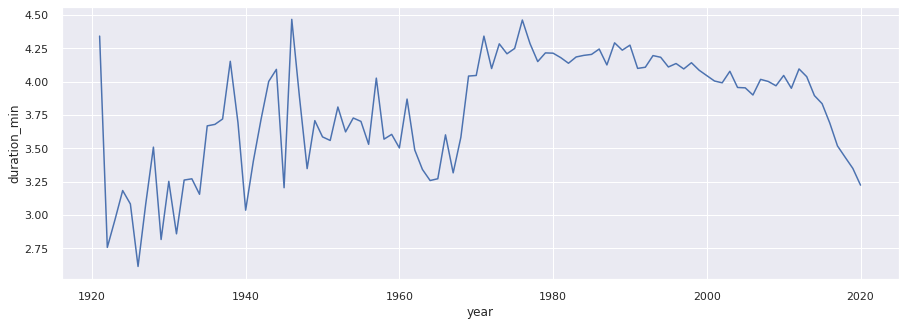

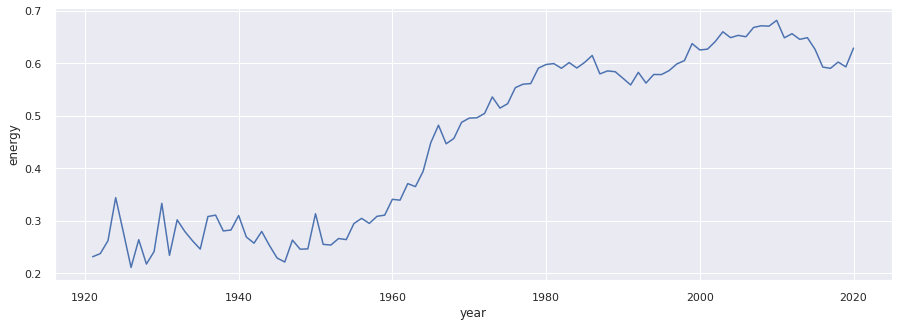

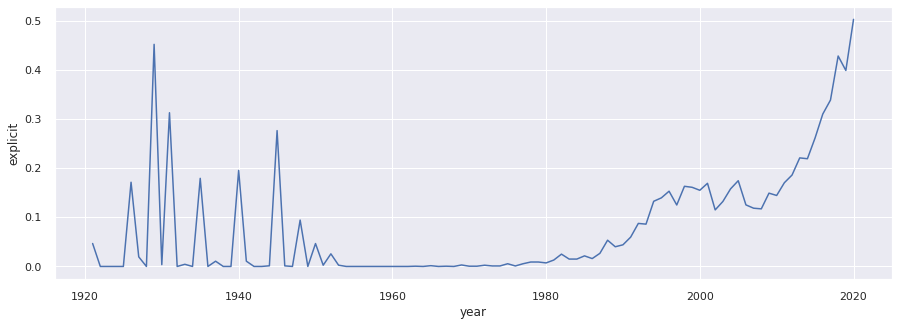

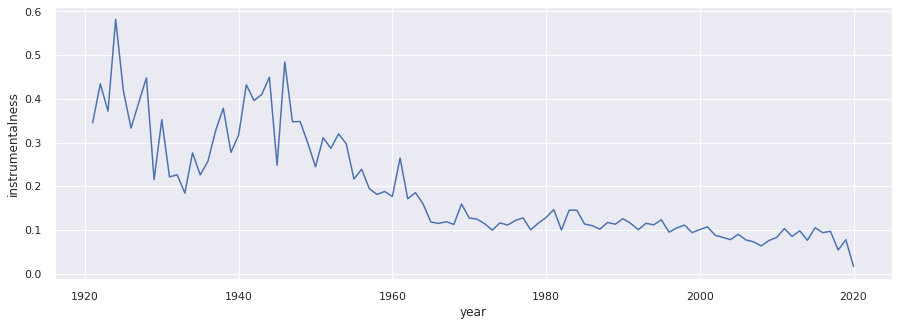

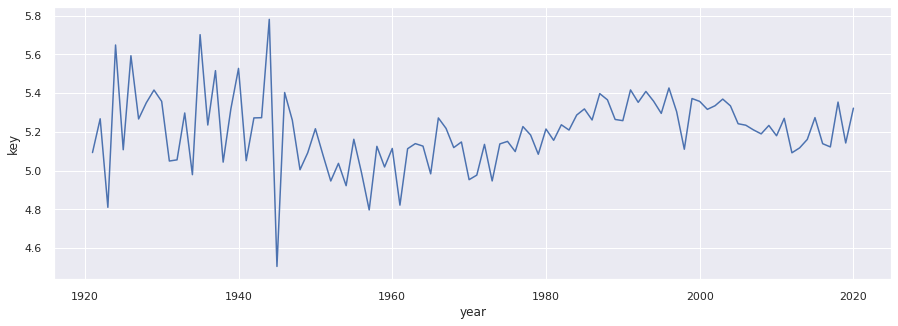

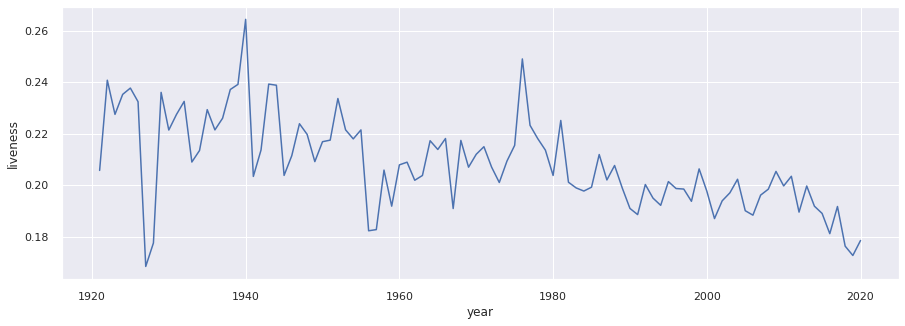

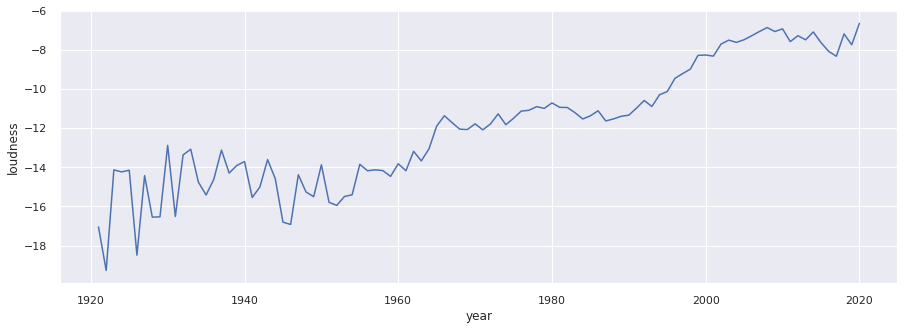

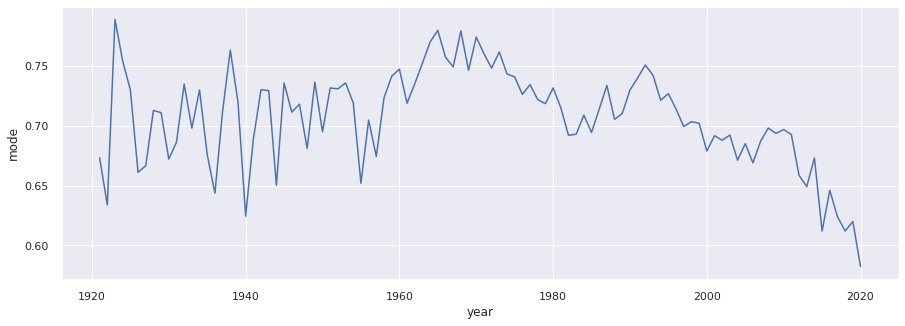

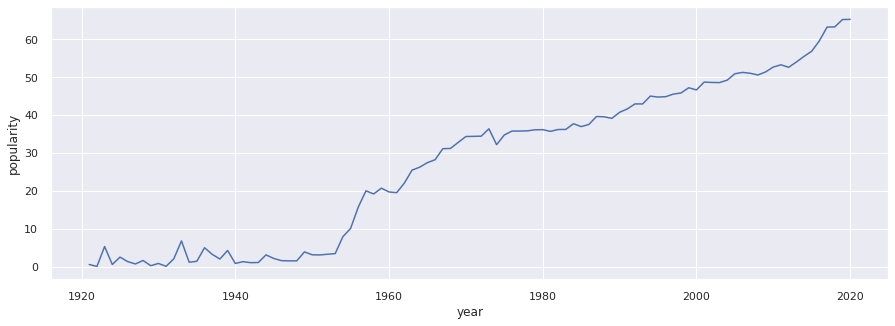

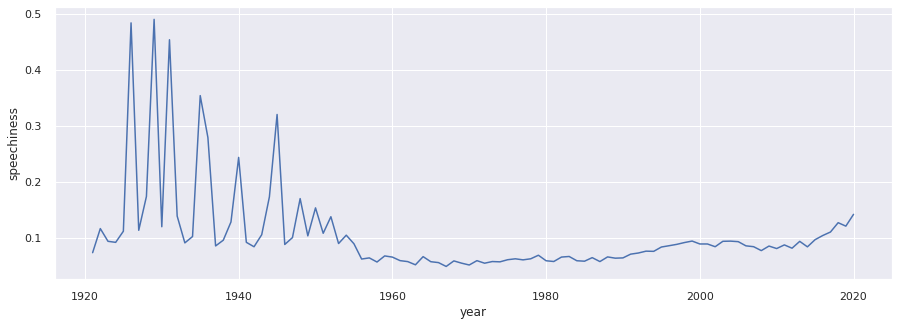

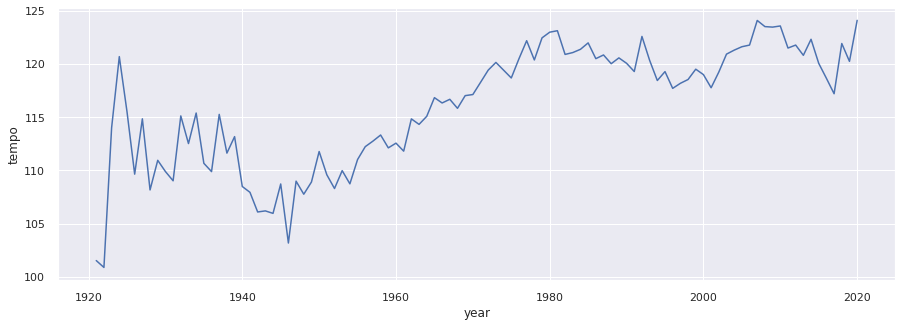

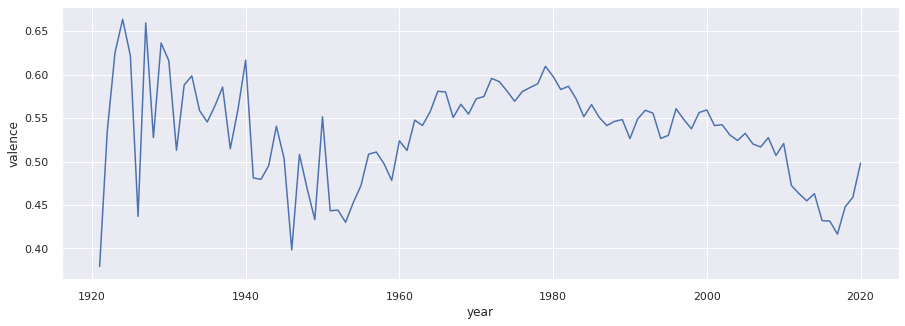

In [33]:
columns = ['acousticness','danceability', 'duration_min', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'valence']
for col in columns:
    y = df.groupby('year')[col].mean()
    x = y.index
    plt.figure(figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.lineplot(x, y)

In [34]:
data=df

In [69]:
data.head(10)

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_min,Song Decade,pred
0,0.0594,0.0,0.985944,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.282389,0.211,0.0,0.878000,0.909091,0.665,0.624916,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.04,0.037732,0.332450,0.153051,1920s,0.041667
1,0.9630,0.0,0.734940,Dennis Day,0.828947,0.341,0.0,0.000000,0.636364,0.160,0.744797,1.0,Clancy Lowered the Boom,0.05,0.427835,0.250243,0.032455,1920s,0.041667
2,0.0394,0.0,0.964859,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.331984,0.166,0.0,0.913000,0.272727,0.101,0.707071,1.0,Gati Bali,0.05,0.034948,0.453125,0.091586,1920s,0.166667
3,0.1650,0.0,0.970884,Frank Parker,0.278340,0.309,0.0,0.000028,0.454545,0.381,0.793736,1.0,Danny Boy,0.03,0.036495,0.411113,0.037902,1920s,0.041667
4,0.2530,0.0,0.960843,Phil Regan,0.423077,0.193,0.0,0.000002,0.272727,0.229,0.781521,1.0,When Irish Eyes Are Smiling,0.02,0.039175,0.417503,0.029899,1920s,0.166667
5,0.1960,0.0,0.581325,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.705466,0.346,0.0,0.168000,0.181818,0.130,0.743779,1.0,Gati Mardika,0.06,0.072165,0.492076,0.072135,1920s,0.166667
6,0.4060,0.0,1.000000,John McCormack,0.524291,0.203,0.0,0.000000,0.000000,0.115,0.773800,1.0,The Wearing of the Green,0.04,0.063402,0.271947,0.028565,1920s,0.041667
7,0.0731,0.0,0.996988,Sergei Rachmaninoff,0.393725,0.088,0.0,0.527000,0.090909,0.363,0.609334,0.0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",0.02,0.047010,0.381373,0.039569,1920s,0.041667
8,0.7210,0.0,1.000000,Ignacio Corsini,0.490891,0.130,0.0,0.151000,0.454545,0.104,0.602803,0.0,La Mañanita - Remasterizado,0.00,0.049794,0.265610,0.028899,1920s,0.041667
9,0.7710,0.0,0.985944,Fortugé,0.692308,0.257,0.0,0.000000,0.727273,0.504,0.682562,1.0,Il Etait Syndiqué,0.00,0.411340,0.449178,0.035456,1920s,0.166667


**Observation** 
- Acousticness and instrumentaliness decreases from time to time (lowest in 2020)
- Danceability, Energy, Explicit, Loudness, and Tempo increases through time
- Speechiness stays within 0.1 to 0.2 after 1960

## Artist with Maximum number of songs

In [35]:




y=pd.DataFrame(df['artists'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Эрнест Хемингуэй,1211
1,Эрих Мария Ремарк,1068
2,Francisco Canaro,942
3,Frank Sinatra,630
4,Ignacio Corsini,628


**Observation** - 'Эрнест Хемингуэй' is the artist with 1211 songs 

## Number of songs released Year Wise

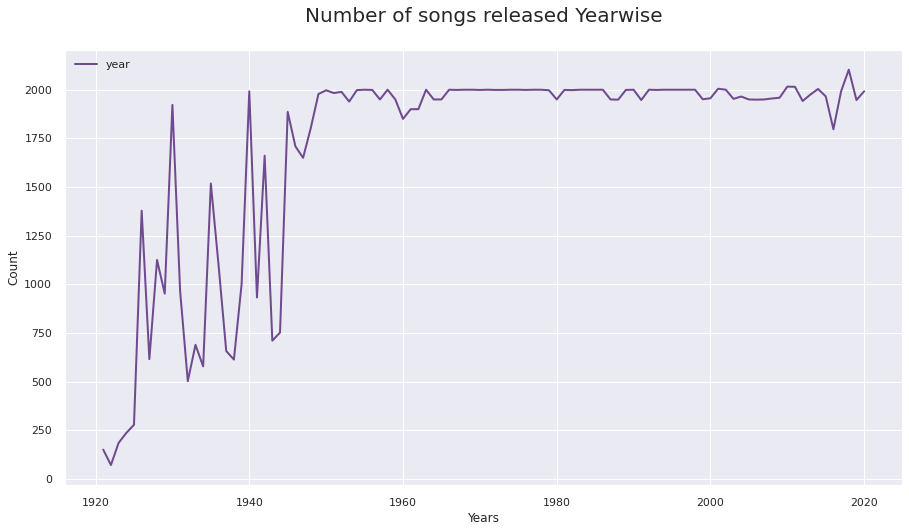

In [36]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

**Observation** - 
- 2103 songs are released in year 2018

- From the dataset creator's own comments, it's likely these are the 2000 most popular songs from each selected year.

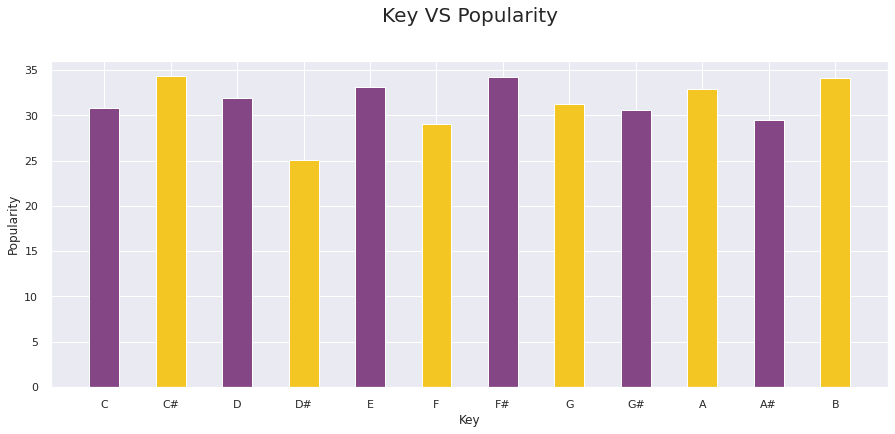

In [37]:
keypop = pd.DataFrame(df.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
plt.bar( keypop['key'],
         keypop['popularity'],
         width=0.45,
         color = ['#844685','#f3c623'])
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
ax.axes.get_xaxis().set_visible(True)

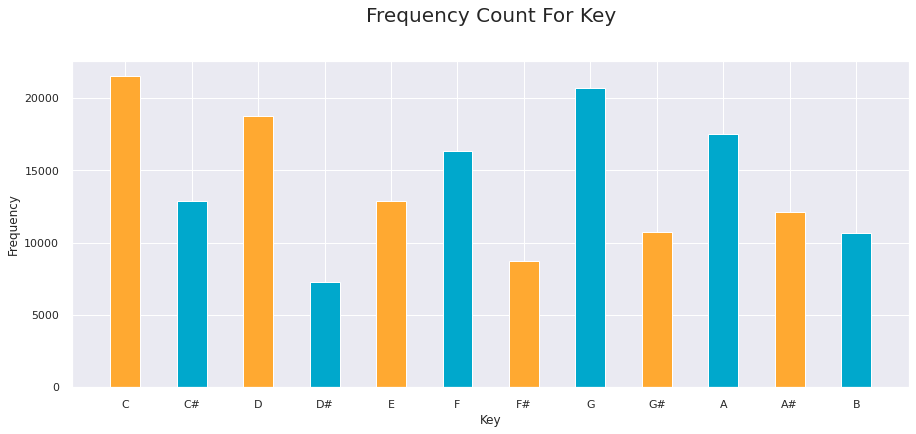

In [38]:
key = pd.DataFrame(df['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['#ffa931','#00a8cc'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

In [39]:
top10_genres = df_by_genres.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [40]:
df_by_genres['genres'].nunique()

2973

In [41]:
df_artist.artists

0                         "Cats" 1981 Original London Cast
1                                "Cats" 1983 Broadway Cast
2              "Fiddler On The Roof” Motion Picture Chorus
3           "Fiddler On The Roof” Motion Picture Orchestra
4        "Joseph And The Amazing Technicolor Dreamcoat"...
                               ...                        
28675                                                  麥志誠
28676                                                  黃品源
28677                                                  黃國隆
28678                                                   黑豹
28679                                                  조정현
Name: artists, Length: 28680, dtype: object

## Feature Selection

We need to design a ML Model that can predicts the Popularity based on the features available. In order to select the features for the model I am using [YellowbrickFeature Correlation Visualizer](https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html).

This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

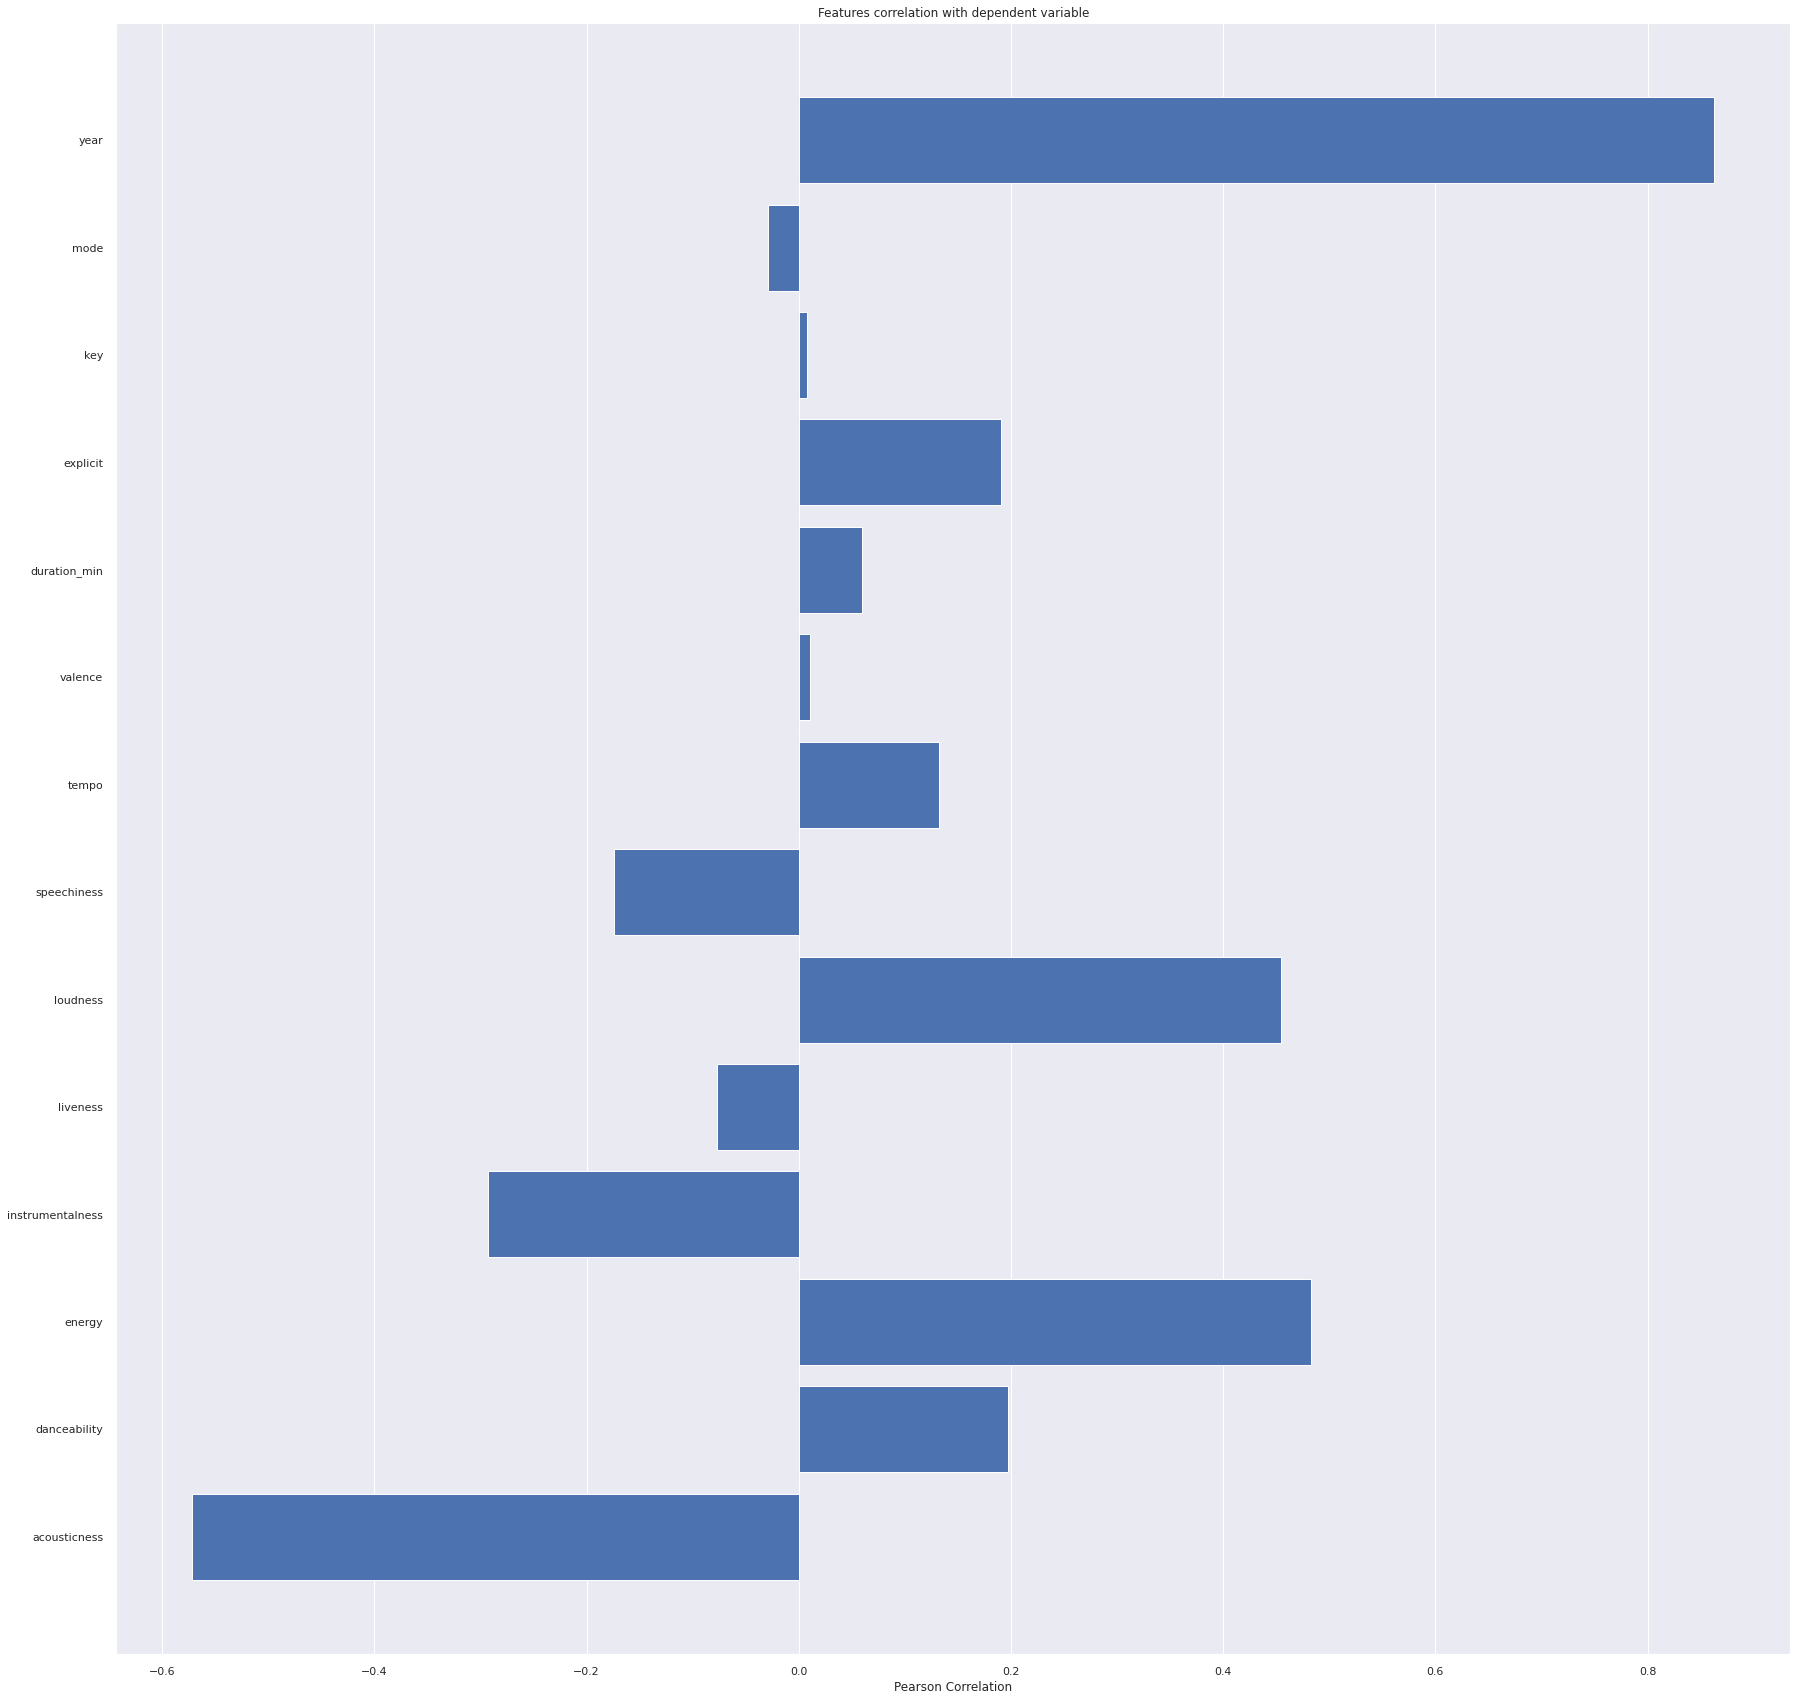

In [42]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

**Observation** From the above graph it is clear that *5* features with negative correlation and *9* features with positive correlation

**Feature Selection** - Choosing which Features can be used in model

1) id: id is unique for each track, therfore cannot assist a model and will be dropped.

2) name: There are 132,940 unique values. This is bit problematic categorical feature to insert in a model, and will be dropped.

3) release_date/year: Release date contains full date along with year. So instead of keeping both the columns Release_date can be dropped and year can be inserted into model

## Pre Processing

In [43]:
cols = list(pd.read_csv('/content/drive/MyDrive/Spotify-Prediction/data.csv', nrows =1))
df1 = pd.read_csv('/content/drive/MyDrive/Spotify-Prediction/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [44]:
X_train.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
74462,0.484,2017,0.2060,['Christian French'],0.550,234192,0.580,0,0.000001,4,0.1190,-7.687,0,0.0784,82.270
146712,0.763,1975,0.5110,['The Marshall Tucker Band'],0.528,150933,0.812,0,0.000284,2,0.1570,-4.983,1,0.0517,110.442
158411,0.931,1959,0.8230,"[""Anita O'Day""]",0.460,125707,0.303,0,0.000000,0,0.0676,-12.567,0,0.1070,170.608
109710,0.329,1942,0.0117,['Orchestra Studio 7'],0.582,224967,0.443,0,0.868000,7,0.0895,-12.506,1,0.0307,94.825
128817,0.585,1960,0.7820,['Quincy Jones'],0.681,138467,0.312,0,0.072800,8,0.1690,-11.488,1,0.0723,121.058


Here we need to replace/modify few data

- object data of the artists with some numerical indicator that identify the artist.
- Eliminates Zero values from tempo columns and replace it 
- standardizing Instrumental Criteria with numeric values
- We use OneHotEncoder from SKlearn to create dummies
- MinMaxScaling for relevant features
- Target Scaling

### Features Transformations

In [45]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X
    


In [46]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

### One Hot Encoder

More Info on how to create dummies can be found here [One Hot Encoder Sklearn Library](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [47]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

### MinMaxScaler

In [48]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

## Target Scaling

In [49]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

## Decision Tree Regressor Model

In [50]:
def Decision_tree(X_train,y_train,X_test,y_test,min_samples_split,max_leaf_nodes):
    """
    Design ML model and returns r2-score and Mean squared Error for Train and Test Datasets
    
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    :param min_samples_split: 
    :param max_leaf_nodes: 
    OUTPUT:
    train_rmse - Root Mean Squared Error for Train dataset
    test_rmse - Root Mean Squared Error for Train dataset
    r2_train - r2-score for Train Dataset
    r2_test - r2-score for Test Dataset
    y_train_pred and y_test_pred - For Visualizing purpose
    mae - Mean Absolute Error
    """
    
    
    tree = DecisionTreeRegressor(max_leaf_nodes =max_leaf_nodes , min_samples_split =min_samples_split )
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    
    y_test_pred = tree.predict(X_test)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    mae = (abs(y_test - y_test_pred)).mean() 
    
    return train_rmse,test_rmse,r2_train,r2_test,y_train_pred,y_test_pred,mae

train_rmse, test_rmse, r2_train, r2_test,y_train_pred,y_test_pred,mae= Decision_tree(X_train,y_train,X_test,y_test,min_samples_split = 200,max_leaf_nodes=167)

print("Root Mean Squared Error for Train dataset is {}".format(train_rmse))
print("Root Mean Squared Error for Test  dataset is {}".format(test_rmse))
print("r2-score for Train Dataset is {}".format(r2_train))
print("r2-score for Test Dataset is {}".format(r2_test))
print("Mean Absolute Error for Test dataset is {}".format(mae))

Root Mean Squared Error for Train dataset is 0.08769988801533653
Root Mean Squared Error for Test  dataset is 0.10884646442377646
r2-score for Train Dataset is 0.8381548180085765
r2-score for Test Dataset is 0.748962091683729
Mean Absolute Error for Test dataset is 0.07926579723971675


In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((136020, 26), (136020,), (34005, 26), (34005,))

In [52]:
y_train_pred.shape, y_test_pred.shape

((136020,), (34005,))

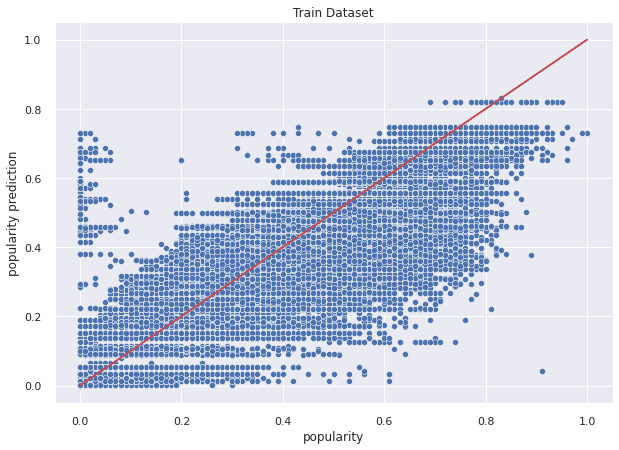

In [53]:
#Plot the results for Train Datasets
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Train Dataset')
plt.show()

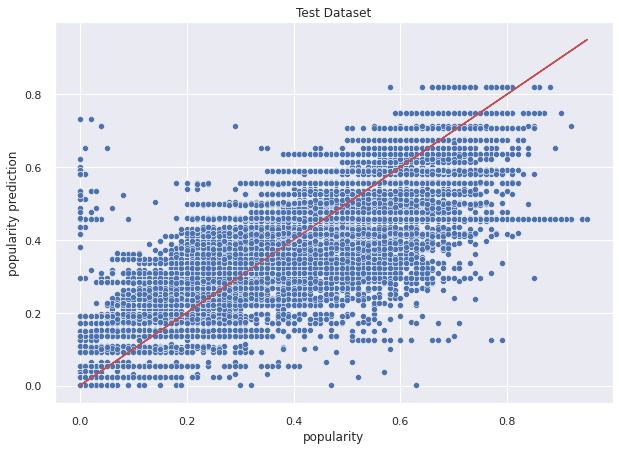

In [54]:
#plot the results for Test dataset
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Test Dataset')
plt.show()

## Decision Tree with GridSearch CV
Using GridSearchCV to find the optimal hyperparameters for the decision tree to predict song popularity.

In [55]:
n_features = df.shape[1]
n_samples = df.shape[0]
 
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'max_depth': [None,5,6,7,8,9,10,11],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )
 
grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Train R^2 Score : 0.840
Test R^2 Score : 0.766
Best R^2 Score Through Grid Search : 0.829
Best Parameters :  {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [56]:
# Decision tree with tuned hyperparameters using GridSearchCV
dec_tree2 = DecisionTreeRegressor(max_depth=9, max_features=None, 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
dec_tree2.fit(X_train,y_train)
y_test_pred2 = dec_tree2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_test_pred2)
print(f'Mean absolute error of this model: {mae2:.3f}')

Mean absolute error of this model: 0.073


## Tweaking the max_leaf_nodes argument

In [57]:
RMSE3_train, RMSE3_test = [], []

for i in range(2,200):
    tree = DecisionTreeRegressor(random_state = 15, max_leaf_nodes=i)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train).clip(0, 1)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    RMSE3_train.append(train_rmse.round(3))
    y_test_pred = tree.predict(X_test).clip(0, 1)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    RMSE3_test.append(test_rmse.round(3))

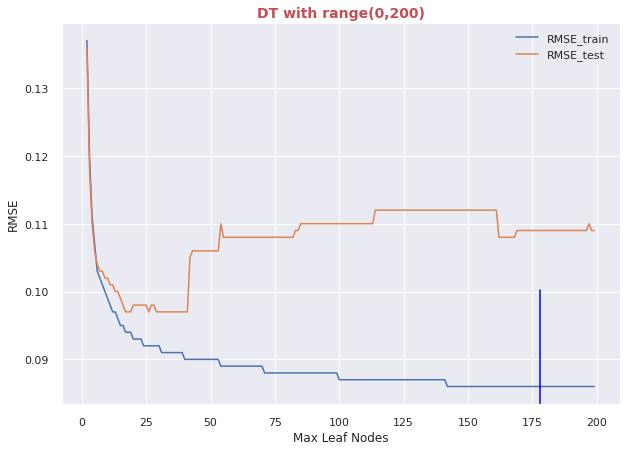

In [58]:
x = np.arange(2, 200)
ax = sns.lineplot(x=x, y=RMSE3_train)
sns.lineplot(x=x, y=RMSE3_test, ax=ax)
ax.axvline(x=178, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('RMSE')
ax.set_title('DT with range(0,200)', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [59]:
gap3 = [(RMSE3_train[i]/RMSE3_test[i]) for i, num in enumerate(RMSE3_train)]

print(f'Minimum validiation is: {min(gap3):.3%} in index number {gap3.index(min(gap3))}')
print(f'Maximum validiation is: {max(gap3):.3%} in index number {gap3.index(max(gap3))}')

Minimum validiation is: 76.786% in index number 140
Maximum validiation is: 101.695% in index number 1


We also tested the data with different test size, in order to check the influence on the results.

Eventually, the best model was a Decision Tree run with test size = 0.2, max_leaf_nodes = 167, max_depth = 9, min_samples_leaf = 1, min_samples_split = 2.

## RandomForest Regressor

In [182]:
def Randomforest(X_train,y_train,X_test,y_test):
    """
    Design Random Forest Regressor model and returns r2-score and Mean squared Error for Train and Test Datasets
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    OUTPUT:
    Test Accuracy
    Mean Absolute Error
    r2-score for Train and Test datasets
    """
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    
    preds = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    mae = (abs(y_test - preds)).mean() 
    y_train_pred = clf.predict(X_train)
    
    y_test_pred = tree.predict(X_test)

    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    return accuracy,mae,r2_train,r2_test

accuracy,mae,r2_train,r2_test =  Randomforest(X_train,y_train,X_test,y_test)
print("Test Accuracy: {:.4f}".format(accuracy*100))
print("Mean Absolute Error: {:.4f} ".format(mae))
print("r2-score of Train Dataset is {} and Test Dataset is {}".format(r2_train*100, r2_test*100))

Test Accuracy: 77.6446
Mean Absolute Error: 0.0756 
r2-score of Train Dataset is 97.6014101315769 and Test Dataset is -88.87226971512993


## Prediction With KNN 

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [95]:
model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [104]:
print('Test Accuracy:', model.score(X_test, y_test))

Test Accuracy: 0.792150297474525


In [119]:
y_pred = model.predict(X_test)
print("R2 Score :", r2_score(y_test, y_test_pred))
print("MSE Score : ", sqrt(mean_squared_error(y_test,y_pred)))

R2 Score : 0.7468737002473064
MSE Score :  0.09904199427468817


## Linear Regression

In [117]:

from sklearn.linear_model import LinearRegression

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("accuracy score : ", lr.score(X_test, y_test))

accuracy score :  0.769611303324672


In [120]:
y_predict = lr.predict(X_test)
print("R2 Score :", r2_score(y_test, y_test_pred))
print("MSE Score : ", sqrt(mean_squared_error(y_test,y_predict)))

R2 Score : 0.7468737002473064
MSE Score :  0.10427381351141797


In [178]:
import time

## Deep Learning

In [140]:
!pip install keras-tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import GRU, LSTM
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras_tqdm import TQDMNotebookCallback

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Flatten, Softmax


In [158]:
modelDL = Sequential()
modelDL.add(Dense(256, activation = 'relu'))
modelDL.add(Dense(128, activation = 'relu'))
modelDL.add(Dense(128, activation = 'sigmoid'))
modelDL.add(Dense(128, activation = 'relu'))
modelDL.add(Dense(128, activation = 'sigmoid'))
modelDL.add(Dropout(0.2))
modelDL.add(Dense(19))
modelDL.add(Softmax())



In [174]:
modelDL.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [176]:
modelDL.fit(x=X_train, y=y_train, epochs=10,
		validation_data=(X_test,y_test),
		)


Epoch 1/10
1451/4251 [=========>....................] - ETA: 12s - loss: 1.0475e-09 - accuracy: 0.1604

KeyboardInterrupt: ignored

## Artist Recommendation System 

Build a content-based recommendation engine which suggests artists

### Normalize Columns

In [61]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [62]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

## Kmeans Clustering

In [63]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')

In [64]:
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,7,13]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [85]:
df.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,0.3990,109.378


In [87]:
df.drop(['id'],axis=1,inplace=True)

In [88]:
#Instanstiate the Recommender Class
recommender = Song_Recommender(df)
recommender.get_recommendations('Red Roses (feat. Landon Cube)', 5)

100%|██████████| 170652/170652 [00:07<00:00, 23418.58it/s]


,artists,name
107318,['Volcano Choir'],Byegone
87928,['Onda Vaselina'],Mírame a los Ojos
36952,['Hiroaki Tommy Tominaga'],JOJO SONO CHINO SADAME
152238,"['Gloc 9', 'Hannah Romawac']",Hinahanap Ng Puso
139563,['Logic'],Never Enough


In [89]:
recommender.get_recommendations('canon in d', 10)

100%|██████████| 170648/170648 [00:07<00:00, 21972.43it/s]


,artists,name
169520,['Baby Lullaby Academy'],Rock a Bye Baby with Relaxing Ocean Waves for ...
70633,['Misfits'],Static Age
82418,['Vashti Bunyan'],Window Over The Bay
117558,"[""Jerry's Kids""]",I Don't Belong
149691,['Fugazi'],Greed
48121,['Big Star'],I'm In Love With A Girl
32266,['Bad Religion'],Suffer
133729,['Minutemen'],Don't Look Now
101682,"['Misfits', 'Glenn Danzig']",Static Age
45456,['John D. Loudermilk'],Language of Love


In [90]:
recommender.get_recommendations('dynamite', 10)

100%|██████████| 170646/170646 [00:07<00:00, 22056.68it/s]


,artists,name
123236,['The Neighbourhood'],Leaving Tonight
17468,['Stealers Wheel'],Stuck In The Middle With You
138391,['Fleet Foxes'],Oliver James
73387,['Arctic Monkeys'],Piledriver Waltz
167580,['Los Rieleros Del Norte'],Te Quiero Mucho
54633,['Seether'],Rise Above This
57080,['Old Dominion'],Never Be Sorry
155514,['Dan + Shay'],Take Me Home For Christmas
167546,['New Edition'],Hot 2 Nite
75151,['Kodak Black'],Remember The Times


In [91]:
recommender.get_recommendations('lovely', 10)

100%|██████████| 170649/170649 [00:09<00:00, 18782.16it/s]


,artists,name
73657,"['Alejandro Fernández', 'Christina Aguilera']",Hoy Tengo Ganas De Ti
17392,['Musiq Soulchild'],sobeautiful
38004,['Harry Styles'],Only Angel
166700,['Hope Sandoval and the Warm Inventions'],Suzanne
84908,['Fleetwood Mac'],Wish You Were Here - 2016 Remaster
15271,['La Tropa Vallenata'],Los Caminos De La Vida
91079,['HELLYEAH'],Moth
69577,['Yngwie Malmsteen'],Black Star
134587,['Danger Danger'],Feels Like Love
136402,['Vico C'],Aquel Que Habia Muerto


In [92]:
recommender.get_recommendations('lonely', 10)

100%|██████████| 170636/170636 [00:07<00:00, 22902.24it/s]


,artists,name
37329,['Taylor Swift'],Out Of The Woods
56065,['Taylor Swift'],Out Of The Woods
88169,['Shaggy'],Keep'n It Real
139742,['P.M. Dawn'],Set Adrift on Memory Bliss (Re-Recorded)
52107,['Portishead'],Numb
55414,['Young the Giant'],Apartment
88438,['Default'],Deny
54467,['George Strait'],How 'Bout Them Cowgirls
150683,['Firehouse'],Here for You
135908,['Garbage'],Supervixen


In [93]:
recommender.get_recommendations('senorita', 10)

100%|██████████| 170652/170652 [00:07<00:00, 21821.34it/s]


,artists,name
165489,['Aaliyah'],No One Knows How to Love Me Quite Like You Do
104554,['Korn'],Wake Up
152285,"['Charizma', 'Peanut Butter Wolf']",Methods
148898,['Münchener Freiheit'],Ohne Dich (schlaf' ich heut Nacht nicht ein)
105051,['Grupo Bryndis'],Mi Preciosa Mujer
36303,['Blitzen Trapper'],Furr
87082,['John Michael Montgomery'],Rope the Moon
137435,['George Strait'],Desperately
68953,"['Michael Bolton', 'Suzi Benson']",From Now On (with Suzi Benson)
69562,['Hawaiian Style Band'],Love And Honesty
